In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc
import re

matplotlib.rc('font', family = 'Malgun Gothic')

## 데이터 불러오기

- 연령 : 전화상담을 받은 고객의 연령
- 직업군 : 전화상담을 받은 고객의 직업군
- 결혼여부 : 전화상담을 받은 고객의 결혼여부
- 학력 : 전화상담을 받은 고객의 최종학력
- 신용카드소지여부 : 전화사담을 받은 고객의 신용카드 소지여부 (자사 S사 카드소지여부)
- 주택대출여부 : 전화상담을 받은 고객의 주택대출여부
- 개인대출여부 : 전화상담을 받은 고객의 개인대출여부
- Contact : 고객의 연락 받은 전화기기 (유선전화 / 휴대폰)
- 통화시간 : 고객과 통화 상담시간 (초단위??)
- 연락시도횟수 : 상담 한건에 대해 연락 시도 횟수
- p_days : 마지막 연락 후 재연락까지 걸린 일자
- 과거통화횟수 : 과거 통화 횟수
- 계약여부 : 신용카드 계약 성공 여부 (yes / no)
- 연락일자 : 연락일자
- 카드종류 : 상담 카드 고유 ID

In [2]:
Telemarket=pd.read_csv("./000_Telemarketing_Data.csv")
Telemarket.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,2018-01-03,87
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,2018-01-03,88
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,2018-01-03,89
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,2018-01-03,90
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,2018-01-03,91


In [3]:
Telemarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연령        41188 non-null  int64  
 1   직업군       41188 non-null  object 
 2   결혼여부      41188 non-null  object 
 3   학력        41188 non-null  object 
 4   신용카드소지여부  41188 non-null  object 
 5   주택대출여부    41188 non-null  object 
 6   개인대출여부    41188 non-null  object 
 7   contact   41188 non-null  object 
 8   통화시간      41188 non-null  int64  
 9   연락시도횟수    41188 non-null  int64  
 10  p_days    1515 non-null   float64
 11  과거통화횟수    41188 non-null  int64  
 12  계약여부      41188 non-null  object 
 13  연락일자      41188 non-null  object 
 14  카드종류      41188 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 4.7+ MB


- 연속형: 연령, 통화시간, 연락시도횟수, 과거통화횟수, 카드종류(5개)
- 범주형 : 10개

## 요약통계량

In [4]:
Telemarket.describe()

,연령,통화시간,연락시도횟수,p_days,과거통화횟수,카드종류
count,41188.00000,41188.000000,41188.000000,1515.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,6.014521,0.172963,156.975721
std,10.42125,259.279249,2.770014,3.824906,0.494901,40.713492
min,17.00000,0.000000,1.000000,0.000000,0.000000,87.000000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,122.000000
50%,38.00000,180.000000,2.000000,6.000000,0.000000,157.000000
75%,47.00000,319.000000,3.000000,7.000000,0.000000,192.000000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,227.000000


## 결측치 확인

In [5]:
Telemarket.isnull().sum()

연령              0
직업군             0
결혼여부            0
학력              0
신용카드소지여부        0
주택대출여부          0
개인대출여부          0
contact         0
통화시간            0
연락시도횟수          0
p_days      39673
과거통화횟수          0
계약여부            0
연락일자            0
카드종류            0
dtype: int64

## 데이터 빈도 확인

In [6]:
for i in Telemarket.columns:
    display(pd.DataFrame(Telemarket[i].value_counts()))
    print("["+i+"]")

,연령
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
89,2
91,2
87,1
94,1


[연령]


,직업군
회사원,10422
산업노동자,9254
기술자,6743
서비스종사자,3969
공무원,2924
은퇴,1720
기업가,1456
자영업자,1421
주부,1060
미취업자,1014


[직업군]


,결혼여부
결혼,24928
미혼,11568
이혼,4612
미확인,80


[결혼여부]


,학력
대졸학사,12168
전문학교,9515
고졸,6045
석박사,5243
중졸,4176
검정고시,2292
미확인,1731
문맹,18


[학력]


,신용카드소지여부
없음,32588
미확인,8597
있음,3


[신용카드소지여부]


,주택대출여부
대출있음,21576
없음,18622
미확인,990


[주택대출여부]


,개인대출여부
없음,33950
대출있음,6248
미확인,990


[개인대출여부]


,contact
휴대폰,26144
유선전화,15044


[contact]


,통화시간
85,170
90,170
136,168
73,167
124,164
...,...
1108,1
980,1
4918,1
2453,1


[통화시간]


,연락시도횟수
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283
10,225


[연락시도횟수]


,p_days
3.0,439
6.0,412
4.0,118
9.0,64
2.0,61
7.0,60
12.0,58
10.0,52
5.0,46
13.0,36


[p_days]


,과거통화횟수
0,35563
1,4561
2,754
3,216
4,70
5,18
6,5
7,1


[과거통화횟수]


,계약여부
no,36548
yes,4640


[계약여부]


,연락일자
2018-03-10,177
2018-04-21,153
2018-06-02,152
2018-03-31,151
2018-09-22,148
...,...
2019-02-05,58
2018-09-09,55
2018-04-15,54
2018-10-15,53


[연락일자]


,카드종류
96,293
98,293
88,293
102,293
89,293
...,...
150,292
182,292
214,292
119,292


[카드종류]


## p_days 이상치 & 결측치 처리

In [7]:
# 과거통화횟수=0 => p_days=0
for t in range(len(Telemarket['과거통화횟수'])):
    if Telemarket['과거통화횟수'][t] == 0:
        Telemarket['p_days'][t] = 0

In [8]:
Telemarket.isnull().sum()

연령             0
직업군            0
결혼여부           0
학력             0
신용카드소지여부       0
주택대출여부         0
개인대출여부         0
contact        0
통화시간           0
연락시도횟수         0
p_days      4110
과거통화횟수         0
계약여부           0
연락일자           0
카드종류           0
dtype: int64

In [9]:
# p_days=0 & 과거통화횟수 !=0 => 제거 (이상치 처리)
index=Telemarket[(Telemarket["p_days"]==0)&(Telemarket["과거통화횟수"]!=0)].index
for i in index:
    Telemarket.drop([i], inplace=True)

Telemarket.reset_index(drop=True)
Telemarket.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,0.0,0,no,2018-01-03,87
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,0.0,0,no,2018-01-03,88
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,0.0,0,no,2018-01-03,89
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,0.0,0,no,2018-01-03,90
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,0.0,0,no,2018-01-03,91


In [10]:
# 제거 확인
Telemarket[(Telemarket["p_days"]==0)&(Telemarket["과거통화횟수"]!=0)]

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류


In [11]:
# p_days 기준 분류
Tele_pday0=Telemarket[Telemarket['p_days']==0]
Tele_pdays=Telemarket[Telemarket['p_days']!=0]

In [12]:
# p_days 결측치 처리
pday_category = {}
Tele_NA=pd.DataFrame()

for i in Tele_pdays['연락시도횟수'].unique():
    pday_category[i] = Tele_pdays[(Tele_pdays['연락시도횟수'] == i)].interpolate(method = 'linear', limit_direction="both")
    Tele_NA=pd.concat([Tele_NA, pday_category[i]])
        
Telemarket=Tele_NA.sort_index()

In [13]:
# p_days 결측치 처리
pday_category = {}
Tele_NA=pd.DataFrame()

for i in Tele_pdays['과거통화횟수'].unique():
    pday_category[i] = Tele_pdays[(Tele_pdays['과거통화횟수'] == i)].interpolate(method = 'linear', limit_direction="both")
    Tele_NA=pd.concat([Tele_NA, pday_category[i]])
        
Telemarket=Tele_NA.sort_index()

In [14]:
Telemarket=pd.concat([Telemarket, Tele_pday0]).reset_index(drop=True)
Telemarket["p_days"]=round(Telemarket["p_days"])
Telemarket

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류
0,38,산업노동자,미혼,미확인,없음,대출있음,없음,유선전화,39,1,6.0,1,no,2018-03-07,130
1,40,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,144,1,6.0,1,yes,2018-03-08,136
2,36,회사원,결혼,대졸학사,없음,대출있음,없음,유선전화,449,1,6.0,1,no,2018-03-16,193
3,36,회사원,결혼,전문학교,없음,대출있음,없음,유선전화,114,1,6.0,1,yes,2018-03-19,219
4,37,회사원,결혼,대졸학사,없음,대출있음,없음,유선전화,119,1,6.0,1,no,2018-03-20,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41168,37,회사원,결혼,대졸학사,없음,대출있음,없음,휴대폰,281,1,0.0,0,yes,2018-05-21,96
41169,73,은퇴,결혼,석박사,없음,대출있음,없음,휴대폰,334,1,0.0,0,yes,2018-05-21,98
41170,46,산업노동자,결혼,석박사,없음,없음,없음,휴대폰,383,1,0.0,0,no,2018-05-21,99
41171,56,은퇴,결혼,대졸학사,없음,대출있음,없음,휴대폰,189,2,0.0,0,no,2018-05-21,100


> p_days 결측치를 0이 아닌 데이터들로만 보간법으로 처리

<AxesSubplot:>

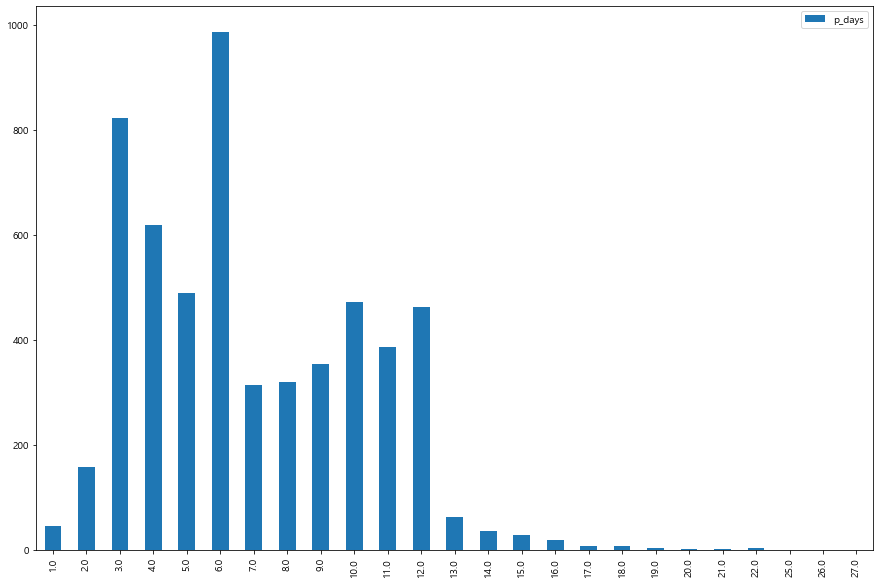

In [15]:
# 0인 경우 제외
Tele_pdays=Telemarket[Telemarket['p_days']!=0]['p_days']

# linear(보간법)
pd.DataFrame(Tele_pdays.value_counts()).sort_index().plot.bar(figsize = (15, 10))

<AxesSubplot:>

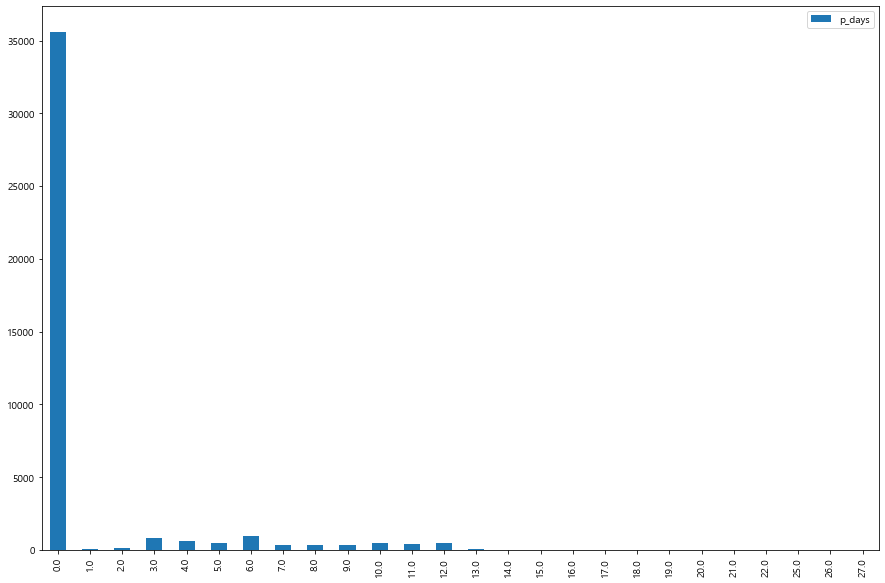

In [16]:
# linear
import matplotlib.pyplot as plt
pd.DataFrame(Telemarket['p_days'].value_counts()).sort_index().plot.bar(figsize = (15, 10))

<AxesSubplot:>

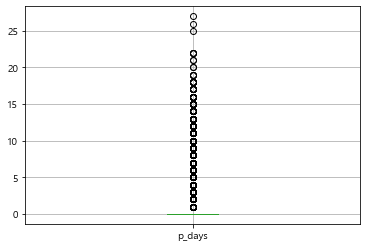

In [17]:
pd.DataFrame(Telemarket['p_days']).boxplot()

array([[<AxesSubplot:title={'center':'p_days'}>]], dtype=object)

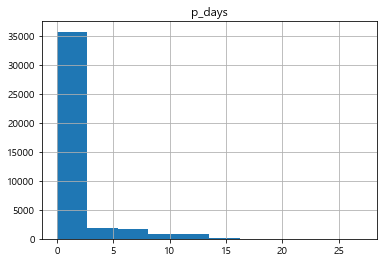

In [18]:
pd.DataFrame(Telemarket['p_days']).hist()

<AxesSubplot:>

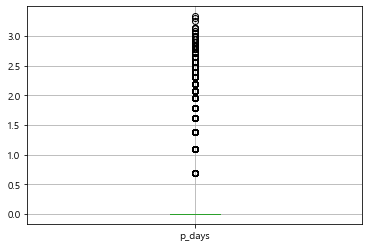

In [19]:
pd.DataFrame(np.log1p(Telemarket['p_days'])).boxplot()

array([[<AxesSubplot:title={'center':'p_days'}>]], dtype=object)

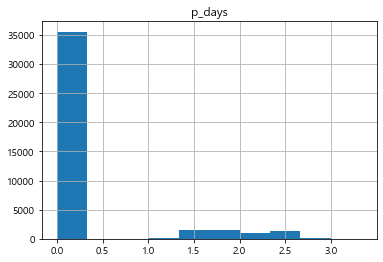

In [20]:
pd.DataFrame(np.log1p(Telemarket['p_days'])).hist()

> 이상치가 매우 크므로 이 columns은 삭제

In [21]:
# 데이터를 새로 불러와서 p_days column 삭제
Telemarket=pd.read_csv("./000_Telemarketing_Data.csv")
Telemarket.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,2018-01-03,87
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,2018-01-03,88
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,2018-01-03,89
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,2018-01-03,90
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,2018-01-03,91


In [22]:
# p_days 삭제
Telemarket = Telemarket.dropna(axis = 1).reset_index(drop = True)

In [23]:
Telemarket.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,과거통화횟수,계약여부,연락일자,카드종류
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,0,no,2018-01-03,87
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,0,no,2018-01-03,88
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,0,no,2018-01-03,89
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,0,no,2018-01-03,90
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,0,no,2018-01-03,91


In [24]:
# 결측치 확인
Telemarket.isnull().sum()

연령          0
직업군         0
결혼여부        0
학력          0
신용카드소지여부    0
주택대출여부      0
개인대출여부      0
contact     0
통화시간        0
연락시도횟수      0
과거통화횟수      0
계약여부        0
연락일자        0
카드종류        0
dtype: int64

> 결측치 없음

## 이상치 확인 및 처리

- 연락시도횟수 이상치 확인 및 처리

array([[<AxesSubplot:title={'center':'연락시도횟수'}>]], dtype=object)

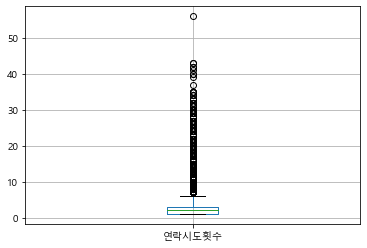

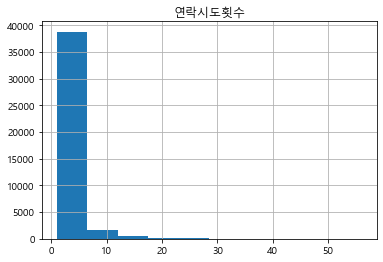

In [25]:
Telemarket[['연락시도횟수']].boxplot()
Telemarket[['연락시도횟수']].hist()

In [26]:
# 이상치 처리
Telemarket = Telemarket[np.log1p(Telemarket['연락시도횟수']) < 2.4]

array([[<AxesSubplot:title={'center':'연락시도횟수'}>]], dtype=object)

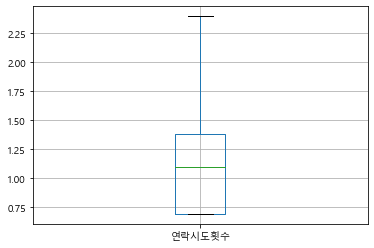

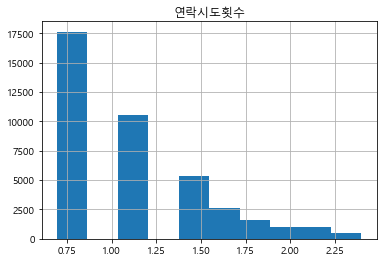

In [27]:
# 이상치 처리 후 boxplot, histogram
np.log1p(Telemarket[['연락시도횟수']]).boxplot()
np.log1p(Telemarket[['연락시도횟수']]).hist()

- 통화시간 이상치 처리

array([[<AxesSubplot:title={'center':'통화시간'}>]], dtype=object)

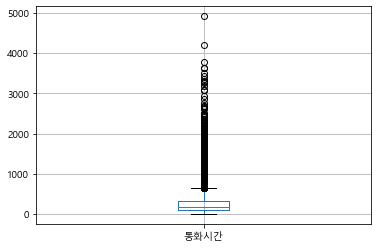

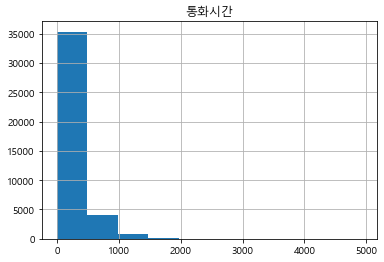

In [28]:
Telemarket[['통화시간']].boxplot()
Telemarket[['통화시간']].hist()

In [29]:
# 이상치 처리
Telemarket = Telemarket[np.log1p(Telemarket['통화시간']) <= 7.44]
Telemarket = Telemarket[np.log1p(Telemarket['통화시간']) >= 3]

array([[<AxesSubplot:title={'center':'통화시간'}>]], dtype=object)

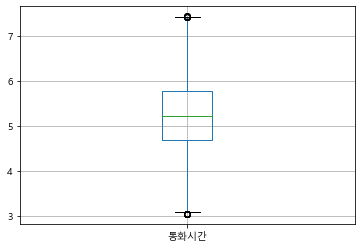

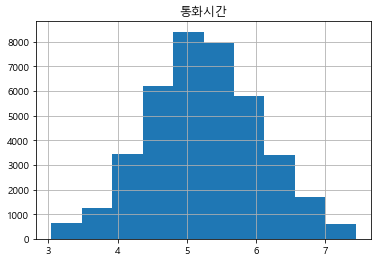

In [30]:
# 이상치 처리 후 boxplot, histogram
np.log1p(Telemarket[['통화시간']]).boxplot()
np.log1p(Telemarket[['통화시간']]).hist()

## 파생변수 생성

- 연령대 파생 변수 생성

In [31]:
Telemarket['연령대'] = Telemarket["연령"].apply(lambda x : str((x//10)*10)+"대")
Telemarket.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,과거통화횟수,계약여부,연락일자,카드종류,연령대
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,0,no,2018-01-03,87,50대
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,0,no,2018-01-03,88,50대
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,0,no,2018-01-03,89,30대
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,0,no,2018-01-03,90,40대
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,0,no,2018-01-03,91,50대


- 요일 파생 변수 생성

In [32]:
date = []

for t in Telemarket['연락일자']:
    date.append(datetime.datetime.strptime(str(t), '%Y-%m-%d').date())
    
t = ['월', '화', '수', '목', '금', '토', '일']
days = []

for d in date:
    days.append(t[d.weekday()])
    
Telemarket['요일'] = days
Telemarket.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,과거통화횟수,계약여부,연락일자,카드종류,연령대,요일
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,0,no,2018-01-03,87,50대,수
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,0,no,2018-01-03,88,50대,수
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,0,no,2018-01-03,89,30대,수
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,0,no,2018-01-03,90,40대,수
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,0,no,2018-01-03,91,50대,수


- 경제활동인구 파생 변수 생성

In [33]:
Telemarket = Telemarket.reset_index(drop = True)

economy_people = ['산업노동자', '서비스종사자', '회사원', '자영업자', '기술자', '공무원', '기업가']
Not_economy_people = ['주부', '학생', '은퇴']

temp = []

for i in range(len(Telemarket)):
    if Telemarket['직업군'][i] in economy_people:
        temp.append("경제활동인구")
    elif Telemarket['직업군'][i] in Not_economy_people:
        temp.append('비경제활동인구')
    else:
        temp.append('미확인')
        
Telemarket['경제활동'] = temp
Telemarket.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,과거통화횟수,계약여부,연락일자,카드종류,연령대,요일,경제활동
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,0,no,2018-01-03,87,50대,수,비경제활동인구
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,0,no,2018-01-03,88,50대,수,경제활동인구
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,0,no,2018-01-03,89,30대,수,경제활동인구
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,0,no,2018-01-03,90,40대,수,경제활동인구
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,0,no,2018-01-03,91,50대,수,경제활동인구


## 최종 Telemarket 저장

In [34]:
Telemarket.to_csv("Telemarket.csv", encoding="cp949", index=False)